### Welcome to Lab 2. In this lab you will:
* Calculate when the next primary and secondary eclipses are for beta Lyrae
* Log in to the observing portal at LCO and pull down old observations of beta Lyrae
* Examine what is wrong with old observations, and use those to guide your own observation of beta lyrae
* Submit a test observation of beta Lyrae

#### It is important that you watch the pre lab video about LCO's observation portal. If you have not done so, please watch it now.

The purpose of this lab is to be able to answer the following questions for your own targets of interest (TOIs)
* What filters should I use?
* How much time should I observe the target in each filter?
* How many observations will I take of my source? Will I manually space observations or use an image sequence to fill entire time slots with as many observations as possible.


Part 1: Choose a driver to perform this part of the lab. Remember you will all work together, then periodically switch drivers -- whereby the next driver will git pull the repository and continue where you last left off.

In class, we found that the Nth eclipse of beta lyrae occurs at a very predictable time. N is some integer, 0,1,2... etc. Note that N is entirely arbitrary. Harmanec chose a date to anchor the formula, and that date happened to be in the 19th century.
In the formula, we had E instead of N. But E is used for special purposes in python, so we are changing to N. 

In fact, we are going to use E in the formula in the python way. 1E-1 is 10^-1, 1E-2 is 10^-2 etc..

The formula was:

In [39]:
from astropy.time import Time
def eclipse_time(N):
    return Time(2408247.966 + 12.913780 * N + (N**2) * 3.87196E-6, format='jd')

print(eclipse_time(1) - eclipse_time(0))
print('notice that the gap between eclipses is just equal to the period.')

print('BEcause eclipse_time returns a Time "object", I can access different attributes of that object to convert the time. For instance:')
print(eclipse_time(1000).ymdhms)
print('So the 1000th eclipse (using this formula) occurs in 1916, in the tenth month, on the 29th day at the second hour.')

12.9137838720344
notice that the gap between eclipses is just equal to the period.
BEcause eclipse_time returns a Time "object", I can access different attributes of that object to convert the time. For instance:
(1916, 10, 29, 2, 49, 51.74399525)
So the 1000th eclipse (using this formula) occurs in 1916, in the tenth month, on the 29th day at the second hour.


Problem 1:

# 1. In the following cell, find the calendar date and hour of the day when the next primary eclipse will occur. E.g., "the next eclipse will occur on 06/30 at 5 PM Universal Time (UT)". Read about https://docs.astropy.org/en/stable/time/index.html astropy.time.Time in order to easily convert to calendar date. Do not use the .ymdhms attribute, there is a much better one for calendar dates!

2. Go to here: https://lco.global/observatory/sites/ and find the timezone for McDonald Observatory (e.g. UTC - X, X some integer). When will this next eclipse occur in this timezone? Will it be night-time there during that eclipse? If not, at what site (in LCO's set of sites) will it be night time during the eclipse?

In [40]:

t = Time(eclipse_time(3957), scale='utc')
print("The next eclipse will occur on", t.iso, ". This will be 5 hours earlier at the McDonald Observatory.")

The next eclipse will occur on 2021-07-12 22:04:50.161 . This will be 5 hours earlier at the McDonald Observatory.


End of Problem

![<caption>](https://www.aavso.org/sites/default/files/images/terrellfig2.gif)
*Beta Lyrae lightcurve as a function of phase in the binary orbit. Phase 0 to 1 takes approximately 12.9 days, the orbital period.*

### Git commit, push. Then switch drivers and git pull

Problem 2

Above is a light curve of beta Lyrae. 


3. How different in hours is the secondary eclipse from the primary eclipse? I.e. what is the time difference between the very bottom of the secondary eclipse and the very bottom of the primary eclipse. Give it in days, not in phase. Feel free to use the plot, and the fact that phase 0 to 1 takes one orbital period of time.

4. Repeat Problem 1.1 and 1.2 but for the secondary eclipse. 

5. Can you observe this star from LCO? Look at the daily visibility: https://lco.global/observatory/tools/visibility/ . Is it visible most of the time? Is it not visible?

6. How long is the secondary eclipse (roughly) in hours?

7. For what time should you schedule your observation and for how long (if you had no constraints on observing time)? I.e., something like: I would schedule a sequence of observations between 15 hours and 18 hours UT on 6/30.

In [42]:
# The difference between the secondary and primary eclipse is about 0.50 in phase. This corresponds to 6.45 days, or 154.8 hours.

t = eclipse_time(3957)
print("The next eclipse will occur at", t.jd - 557280)
print("The eclipse will occur in CT at McDonald Observatory at", t.jd - 539280)

The next eclipse will occur at 1902128.4200250139
The eclipse will occur in CT at McDonald Observatory at 1920128.4200250139


End of problem

## Part 2: The LCO Archive and scheduling observations

* Navigate to https://observe.lco.global/
* Go to "manage Proposals"
    ![<caption>](lab2_resources/manage_proposals.png)
* Then click on " DDT2021A-008"
* Then go to "view observation requests:
    ![<caption>](lab2_resources/view_obs_requests.png)
    

### You should now be at the main overview screen. This is where you can duplicate old observations, and create brand new ones.

It looks like this. It will change as you all submit observations. Observations will show up here:

![<caption>](lab2_resources/main_screen.png)

Click on "Submit observation"
Most of these settings, you do not need to change. But there are a few you should know. 
* Look at "Name" and "Proposal". Proposal should be set to our class proposal -- "SBIG Stellar and planetary science"
* Name is the name you want to give this particular observation. Give it a unique name that is not likely to conflict with other students. A good identifier is: "target name: group identifier: your initials: Number". So "Beta Lyrae: Gp 3: GMB: 1". Then if you did a second beta lyrae observation, you would write: "Beta Lyrae: Gp 3: GMB: 2"

Next, scroll past Exposure and exposure type, and exposure time. Go to the Target sub window:
![<caption>](lab2_resources/target_sub_window.png)
    
    
Go ahead and enter the name of the target as you see it on SIMBAD. E.g., Beta lyrae. If the observation portal has difficulty resolving it, try the HD name. See http://simbad.u-strasbg.fr/simbad/sim-id?Ident=Beta+Lyrae -- because it would be no fun if I just gave you the HD name to start with!.
    
Now the fields should autopopulate:
![<caption>](lab2_resources/populated_ra_dec.png)
    

### Problem 2.5. You still need a filter. For now, set it to SDSS-gp. Go to https://skyserver.sdss.org/dr1/en/proj/advanced/color/sdssfilters.asp . What wavelength is SDSS-gp centered on? What color is this?

this would be the "green" wavelength, which appears blue to us.

End of Problem

## Now, you still need an exposure time (how long in seconds you will observe the star for) and whether or not you will do an exposure sequence.

For an exposure sequence, you provide a duration (e.g., 30 minutes) and an exposure time per observation (say 2 seconds), and then the telescope will stay on target and take frame after frame for 2 second exposures -- filling the 30 minute time slot.

But what exposure time should we use? Let's figure that out.

Problem 3.

Use the s/n calculator https://exposure-time-calculator.lco.global/ and in the space below, tell me what time you think you should expose for.

Short, maybe one second. and defocused.

End of problem.

Now remember this? 
![<caption>](lab2_resources/populated_ra_dec.png)
    
    
Click on the number in front of existing frames. This will bring you to the LCO archive, where you can find all other observations of the source.
    
    
Look at the exposure time column.
    
![<caption>](lab2_resources/archive_screenshot.png)

Problem 4.

Go and download one of the 2.3 second exposed frames. R level means reduction level. We want the polished, final versions of the images. So make sure R level is set to "BANZAI". Banzai is the name of the pipeline that polished the images (which is written in python by the way). "Reduction" is the scientific word for polishing data, basically.

So with one of these frames in hand. Load it into python here
use astropy.io and fits. E.g.;
from astropy.io import fits
image_data = fits.open('path_to/file.fits.fz')['SCI'].data  #'SCI' to get the science data. [1] works as well.

display it with plt.imshow()

Zoom in (either by hand or by slicing the region) on the bright star in the center (that is beta lyrae). Adjust the scale until your image looks like this one:
You might need to adjust vmin and vmax of LogNorm() https://matplotlib.org/stable/tutorials/colors/colormapnorms.html .

![<caption>](lab2_resources/beta_lyrae_saturation.png)

    
The questions are:
    1. What is going on here? Why does the star seem to have this horn of high-count pixels on it? What is going on? It might help to display a binary image, by doing something like: "plt.imshow(image[image > 100000)])"
    
    Read this: https://www.princetoninstruments.com/learn/camera-fundamentals/full-well-capacity-pixel-saturation and explain what you think is going on.

2. Looking at the image, how many counts is the saturation limit for the 0.4 meters?
    
3. How might you fix (and avoid saturation) this with a future observation? 
    
4. What filters seem to be a good choice to observe in?

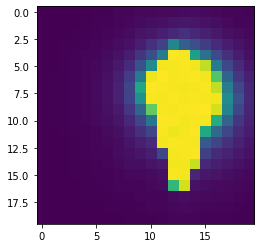

In [90]:
from astropy.io import fits
import matplotlib.pyplot as plt


plt.imshow(image_data[1050:1070,1500:1520])

# 1. the image is oversaturated -- there was too much charge
# ie, it was too bright to properly be photographed.
# the extra charge spilled over, creating a horn.
# 2. I can't wrap my head around finding the
#"counts" from looking at the photo, but a 0.4m
#telescope at LCO has a full well capacity of 100,000e-.
# 3. shorter exposure time could help not oversaturate the image.
# 4. The magnitudes for B-Band and V-Band of Beta Lyrae are lesser (meaning the number is larger), so one of these.


## End of problem.

The problem that saturation causes is that it makes photometry very difficult. For instance, how many photons hit a saturated pixel with 100,000 counts?

You don't know, you just know that it was over some threshold. It is akin to placing a 100 ounce bucket out in the street on a rainy day. At the end of the day, you might find that the bucket is full. How many ounces of water fell into the bucket? You only know that it was at least 100 ounces. It could have been 300 ounces or 101 or 250... you just don't know.

What is worth with CCD's, and has no analogy to buckets of water, is that after a number of counts (about 60,000 for the 0.4 meter SBIG cameras) they go *nonlinear*. Meaning it might take 1000 photons to elevate a pixel's counts from 50,000 to 60,000, but then it might take 1500 photons to elevate the counts from 60,000 to 70,000. So again, this makes photometry nearly impossible.

To reduce the number of counts, you can reduce the exposure time. The minimum observation time is 1 second. The shutter on the camera cannot open nor close much faster. There is a way to avoid saturation without reducing observation time. This is achieved by defocusing the telescope. Defocusing the telescope spreads the light out into a donut, making it cast further over the chip. One can do this with the "Defocus" parameter when you are scheduling an observation. A decent value is 0.2 or 0.3 mm.

However, the 0.4 meters have a hardware flaw that causes them to sometimes *not return to the original focus*. For this reason, we recommend you do not use the defocus. You can -- but do it at your own risk.. 


The easiest solution, frankly, is to pick a source that is fainter. Something around 6th or 7th magnitude, and then take 10 or 20 second observations (or however long you find that you need).



The signal to noise calculator also gives the "peak counts" in  PkDN. This is the highest number of counts you can expect to exist for the star you are observing. You should observe so that in practice, you get between 10,000 and 40,000 counts. However, this is where things get hard.
The S/N calculator is only approximate. These things complicate the observation
* Thin clouds above the telescope. Thin clouds will decrease the signal to noise and peak counts of the observation. In bad cases, where a thick cloud passes overhead, entire exposures may be aborted because the guide star (What the telescope "locks" onto) may be lost.
* How low above the horizon the star is. This is characterize by the "air mass" parameter. Note that in your observation request, you can select the maximum airmass you want to observe through. Exactly at zenith (right overhead) corresponds to an air mass of 1. Typical observations restrict your request to a cone with an opening angle of 104 degrees -- or 52 degrees off the horizon. This is an airmass of 1.6. Lower on the horizon corresponds to higher air mass. https://www.pveducation.org/pvcdrom/properties-of-sunlight/air-mass

Problem 5.

1. If needed, you can increase the air mass maximum of your observation. 2 is usually a safe upper limit. But there is no subsitute here for doing your due research. The formula for air mass is simply 1/cos(theta). What angle theta corresponds to an air mass of 2? Can also use https://www.pveducation.org/pvcdrom/properties-of-sunlight/air-mass

The throughput (atmospheric extinction) is wavelength and site dependent, but typical values of what you lose per airmass are:

B: 30%; V: 17%, R: 9%, I: 7%
So in any B filter, you might lose 60% of your light at an air mass of 2, and 30% at an airmass of 1. in R, you are less affected. 


2. Set the exposure time in your beta lyrae calculation to 1 second. Then look at the visibility plot in the bottom. Change the airmass to 2 and see how that affects the visibility. Do you need to increase the air mass limit to 2? Or is 1.6 good enough?

3. Change the target name to "CO Cep". This is a fainter eclipsing binary. Note that you need an exposure time of more like 100 seconds for this target, but we won't schedule anything for it just yet. Keep the airmass at 1.6. How long can you observe the star for?

4. Set the airmass to 2, and click another cell so that the visibility refreshes. Now how long can you observe for an at how many sites?

5. Would CO Cep (at this time of year) then be a good option for increasing air mass limits to 2?


At the end of this all, change the target back to the "beta Lyrae"

1. an angle of 60 degree gives an airmass of 2.
2. 1.6 seems just fine. It's closer to the limit but there is still plenty of observable time.
3. CO Cep can be observed at 1.6 airmass for one hour.
4. there are 2 more sites, about 3 times the observing time now available.
5. absolutely, as the observation will take longer, so you'll want more available observation periods.

End of problem.

Create a test beta lyrae observation for a single 2 second exposure. Then scroll to the top of the page where it says total observation time. You should see something like this:
![<caption>](lab2_resources/total_observation_time.png)


But wait!! You scheduled a 2 second observation. Why is it going to eat up 2 minutes of your telescope time??
    
Why is this? Read the "Observation overheads" section from https://lco.global/observatory/process/guidelines/ , along with this different reference about a different telescope (called James Webb Space Telescope; JWST) https://jwst-docs.stsci.edu/jwst-observatory-functionality/jwst-observing-overheads-and-time-accounting-overview/slew-times-and-overheads#SlewTimesandOverheads-Initialslew . Explain why there is about a minute and a half of overhead on top of your observation.



Problem 6

Does each exposure incur the same overhead penalty? Or if you do a "image sequence" can you get in, say 30 exposures, with only one slew and settle overhead? For a test, lets change to an exposure sequence. Select exposure sequence, and set the duration to 200 seconds:

![<caption>](lab2_resources/exposure_sequence.png)
    
    
So you are going to fill 200 seconds of on-target time with as many 2 second exposures as you can. On top of each 2 second observation, there is a N second "read out" time where the image is effectively downloaded off the CCD. Read https://lco.global/observatory/process/guidelines/ and tell me what the read out time is.
    
    1. What is the read out time for the 0.4 meter SBIG?
    2. How many 2 second exposures then will fit in your 200 second window?
    3. What is the total observation request? Has the observation overhead increased by e.g., 20 minutes since you are now taking ~10 exposures? Or is the total time now 2 minutes + 200 seconds (roughly)?
    4. What does this tell you about efficiently scheduling exposures? Should you schedule single exposures by hand? Or sequences of exposures when possible?

1. 14 seconds
2. about 12 exposures
3. 4 minutes 52 seconds
4. more at once is better. the largest amount of time comes from just moving the telescope. Once it is in place, exposures are fairly quick.

End of problem.

Final Problem 

Go ahead and schedule a single exposure of a source (e.g., beta lyrae or CO Cep, or anything of your choice). Make sure that the exposure time will not result in significant saturation. For instance, don't observe beta lyrae for 10 seconds -- observe it for 1 or 2 seconds.


Schedule this observation, make sure all the check marks appear green and that the "total time used" is less than 5 minutes. If you have a good reason for scheduling a longer test observation, double check with the TA.

Set the observation window to between today and 3 days from now. Longer windows give a larger chance of your observation actually happening.

Click "submit request at the top right." Make sure it goes through.

Now, you can either let the observation finish, or cancel it. If you leave it alone, it will probably happen within the next day or so. If you don't want to use the 5 minutes of your time on this test observation, then click cancel.

Otherwise, your observation and data should appear here in a couple days!

End of problem.


Remember that you calculated that the beta lyrae transit was long -- a couple days. For other eclipsing binaries that you might discover, the transit might just be a few hours. Still, you only have 1.5 hours to observe a few hour transit (or in the case of beta lyrae, a few day transit). There are a couple ways you can go about this:

* Schedule several observations during the transit, like we discussed in the prelab. So you might schedule a 10 minute block of observations right at egress. Another 10 minute block 4 hours later, and so forth. Then schedule a few of these blocks during the minimum of the transit. I'm going to call this method "sparse sampling" of the transit. However, as you found above, do not schedule single observations. Overhead will quickly eat up your telescope time.

* Shorter orbital periods help, because the transits are faster. Algol is not visible currently from any LCO telescopes. It is too close to the sun. However, if you wanted to observe a star like Algol, that just has a few hour transit, then you could do sparse sampling like above. OR you could coordinate with another group and pool your time. With two groups, you could just schedule a single 3 hour block (or two consecutive 1.5 hour blocks) that cover the entire transit of an Algol-like star. That would produce a beautiful data set!

There is a slack channel dedicated to such a discussion: "#observing-coordination"
Also, on Monday’s discussion section, we will have a big group discussion, based on what sources people are observing (in breakout rooms named after the sources), where people can consider what sources they want to observe and coordinate observations. 

Note that professional astronomers do this all the time. Research groups lend other groups time so that they can, together, produce a better science result. 


For the rest of this lab, this weekend and tomorrow (friday), you and your group should try and find some great targets of interest (TOI's) that you may want to observe. Remember, these don't have to be eclipsing binaries or transiting hot jupiters -- they can also be just interesting variable stars.

You should aim to schedule the majority of your observations early next week!


The rest of this document is filled with tips. Please read before embarking on your search for good targets to observe.
Tips:

Try doing cuts of targets on Right ascension. E.g., use the general catalog of variable stars on vizier, and restrict RA to be less than 4 hours and greater than 10 hours -- this will give you everything that is NOT behind the sun. These sources are most likely visible from one of LCO's many observation sites.

Look for brightnesses between 6th and 10th magnitude. This will make it so that you won't saturate, yet will still only need observation times between a few seconds and ~100 seconds. Again, you can do such a cut in Vizier: https://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=B/gcvs/gcvs_cat


Navigating to the search page and entering these parameters, will give you a large list of variable stars (not just eclipsing binaries) that are brighter than 10th magnitude and between 0 to 4 hours RA or 10 and 24 hours RA. You'll want to press "Enter" on your keyboard when you finish filling in the query cell.:

![<caption>](lab2_resources/vizier_search.png)

Sort by magnitude and scroll down the list. Can you find one that is an eclipsing binary (type EB) and has a short orbital period? Hint: there is one, and its simbad name starts with HD 1307X    I won't yet tell you the last digit X.... The name of the star in this catalog will be different (it ends with "And")

One last observing tip: When you are viewing a past observation (cancelled or ongoing or pending, anything is OK), you can "copy" the observation. This will open up a new observation request form with the same parameters as that past observation.

![image.png](lab2_resources/copy_form.png)